In [2]:
import pandas as pd

def calculate_tci(rainfall_intensities):
    """
    Calculate Temporal Concentration Index (TCI) based on the rainfall intensities over time.
    
    Parameters:
        rainfall_intensities (list or np.array): Rainfall intensities over the event duration.
        
    Returns:
        tci (float): Temporal Concentration Index.
    """
    
    # Convert the rainfall intensities to a numpy array for easy calculation
    rainfall_intensities = np.array(rainfall_intensities)
    
    # Calculate the cumulative rainfall over time
    cumulative_rainfall = np.cumsum(rainfall_intensities)
    
    # Calculate the total rainfall of the event
    total_rainfall = cumulative_rainfall[-1]
    
    # Calculate the proportion of total rainfall at each time step
    rainfall_proportion = cumulative_rainfall / total_rainfall
    print(rainfall_proportion)
    # Find the time step where 50% of the rainfall is reached
    half_rainfall_index = np.argmax(rainfall_proportion >= 0.5)
    print(half_rainfall_index)
    # TCI can be calculated as the time step at which half the rainfall occurs
    # Or, you could normalize it relative to the event duration
    tci = (half_rainfall_index + 1) / len(rainfall_intensities)
    
    return tci


In [3]:
sample = pd.read_csv("/nfs/a319/gy17m2a/PhD/datadir/DanishRainData/Sample1.csv", encoding="ISO-8859-1")

### Find metrics

In [134]:
# from scipy.stats import skew

# results2 = []
# for _, row in events_df_future[:100].iterrows():
#     intensities = row.dropna()  # Drop NaNs for this event
    
#     # Calculate skewness
#     asymmetry = skew(intensities)
#     tci = calculate_tci(intensities)
#     d50=calc_d50_with_interpolation(intensities)
#     # Calculate coefficient of variation (CV)
#     unevenness = np.std(intensities) / np.mean(intensities)
    
#     results2.append({'Asymmetry': asymmetry, 'Unevenness': unevenness, 'tci': tci, 'd50': d50})
    
# # Convert results to DataFrame
# results_df_future = pd.DataFrame(results)
# results_df_future['D50']=future['D50_new']
# results_df_future['duration']=future['duration']
results_df_future_no4h = results_df_future[results_df_future['duration']>12]

In [ ]:
results = []
for _, row in events_df_present.iterrows():
    intensities = row.dropna()  # Drop NaNs for this event
    
    # Calculate skewness
    asymmetry = skew(intensities)
    tci = calculate_tci(intensities)
    # Calculate coefficient of variation (CV)
    unevenness = np.std(intensities) / np.mean(intensities)
    
    results.append({'Asymmetry': asymmetry, 'Unevenness': unevenness, 'tci': tci})

# Convert results to DataFrame
results_df_present = pd.DataFrame(results)
print(results_df_present)

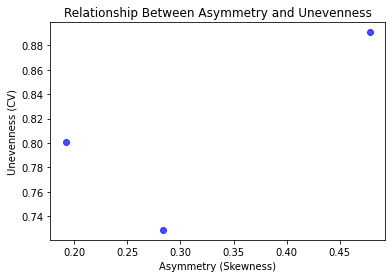

Pearson correlation: 0.71 (p-value: 0.498)


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, pearsonr

# Example DataFrame: Each row is an event, and columns are time steps with rainfall intensities
# Replace with your actual data
rainfall_data = pd.DataFrame({
    'event_1': [0, 5, 10, 15, 10, 5, 0],
    'event_2': [5, 15, 25, 20, 10, 5, 0],
    'event_3': [0, 0, 5, 10, 20, 15, 5]
}).T

# Calculate metrics for each event
results = []
for event in rainfall_data.iterrows():
    intensities = event[1].values
    
    # Asymmetry: Skewness
    asymmetry = skew(intensities)
    
    # Unevenness: Coefficient of Variation
    unevenness = np.std(intensities) / np.mean(intensities)
    
    results.append({'Asymmetry': asymmetry, 'Unevenness': unevenness})

# Create a results DataFrame
results_df = pd.DataFrame(results)

# Scatter plot to visualize the relationship
plt.scatter(results_df['Asymmetry'], results_df['Unevenness'], c='blue', alpha=0.7)
plt.xlabel('Asymmetry (Skewness)')
plt.ylabel('Unevenness (CV)')
plt.title('Relationship Between Asymmetry and Unevenness')
plt.show()

# Correlation
correlation, p_value = pearsonr(results_df['Asymmetry'], results_df['Unevenness'])
print(f"Pearson correlation: {correlation:.2f} (p-value: {p_value:.3f})")
